In [1]:
import pandas as pd
import numpy as np
from plotnine import *

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
%%bash
rm -f arith.txt
find Benchs -name 'arith.txt' >> arith.txt

In [3]:
files = []
with open('arith.txt') as f:
    for line in f:
        files.append(line.strip())

In [4]:
# insts = ['Add', 'Sub', 'Xor', 'Shl', 'LShr', 'AShr', 'Mul', 'UDiv', 'SDiv', 'And', 'Or']
insts = ['Add', 'Sub', 'Xor', 'Mul', 'FAdd', 'FSub', 'FMul']
header = insts + [ x + '_total' for x in insts]

In [5]:
df = pd.DataFrame(columns=['Benchmark', 'Group'] + header)
for f in files:
    df2 = pd.read_csv(f, header=None).transpose()
    df2.columns = df2.iloc[0]
    df2 = df2[1:]
    d = dict()
    for h in insts:
        try:
            d[h] = float(df2.iloc[0][h])/float(df2.iloc[1][h])
        except:
            d[h] = 0.0
        d[h + '_total'] = df2.iloc[1][h]
    d['Benchmark'] = f.split('/')[1] if len(f.split('/')) == 3 else f.split('/')[2]
    d['file'] = '/'.join(f.split('/')[1:-1])
    d['Group'] = f.split('/')[1]
    df = df.append(d, ignore_index=True)

df = df.round(3)


for h in insts:
    df[h + '_total'] = df[h + '_total'].astype(np.int64)

In [6]:
df.head()

,Benchmark,Group,Add,Sub,Xor,Mul,FAdd,FSub,FMul,Add_total,Sub_total,Xor_total,Mul_total,FAdd_total,FSub_total,FMul_total,file
0,mandel-2,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/mandel-2
1,dt,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/dt
2,flops-5,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/flops-5
3,flops-2,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/flops-2
4,oourafft,Misc,0.000,0.000,0.000,0.000,0.029,0.040,0.000,0,0,0,0,1753816130,1272312067,102001020,Misc/oourafft


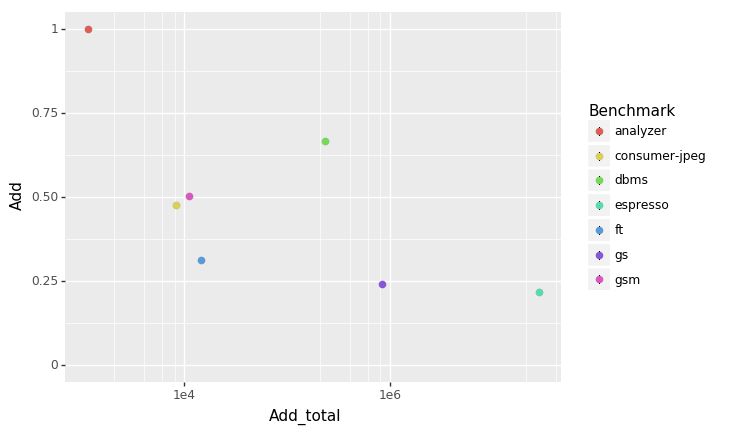

<ggplot: (-9223372036576991537)>

In [8]:
(ggplot(df[(df.Add > 0.2) & (df.Add_total > 100)])
 + scale_x_log10()
 + geom_point(aes(x='Add_total', y='Add', fill='Benchmark'), stroke=0.02, size=3)
 + ylim((0, 1.0))
)

In [10]:
def get_column(df, cn, th=0.3, min_abs=100000):
    return df.query('({cn} >= {th}) & ({cn}_total >= {min_abs})'.format(cn=cn, th=th, min_abs=min_abs)) \
            .sort_values(by=cn)[['Group', 'Benchmark', 'file', cn, cn + '_total']]

### FAdd

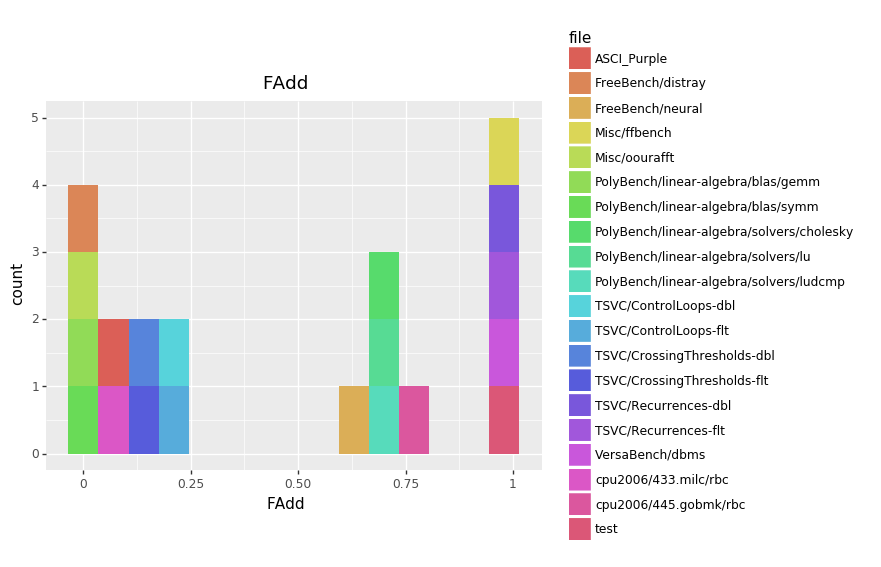

<ggplot: (277829552)>

In [11]:
t = 'FAdd'
(ggplot(get_column(df, t, th=0.02, min_abs=0))
 + geom_histogram(aes(x=t, fill='file'), bins=15)
 + ggtitle(t)
)

In [14]:
get_column(df, 'FAdd', th=0.01, min_abs=0)

,Group,Benchmark,file,FAdd,FAdd_total
65,PolyBench,linear-algebra,PolyBench/linear-algebra/blas/symm,0.020,600600000
61,PolyBench,linear-algebra,PolyBench/linear-algebra/blas/gemm,0.021,1320000000
211,FreeBench,distray,FreeBench/distray,0.021,3313480
4,Misc,oourafft,Misc/oourafft,0.029,1753816130
195,ASCI_Purple,ASCI_Purple,ASCI_Purple,0.053,912325
145,cpu2006,433.milc,cpu2006/433.milc/rbc,0.072,15353280000
77,TSVC,CrossingThresholds-dbl,TSVC/CrossingThresholds-dbl,0.110,1708492800
90,TSVC,CrossingThresholds-flt,TSVC/CrossingThresholds-flt,0.110,1708492800
98,TSVC,ControlLoops-dbl,TSVC/ControlLoops-dbl,0.211,997120000
105,TSVC,ControlLoops-flt,TSVC/ControlLoops-flt,0.211,997120000


In [15]:
get_column(df, 'Add', th=0.01, min_abs=0)

,Group,Benchmark,file,Add,Add_total
115,tramp3d-v4,tramp3d-v4,tramp3d-v4,0.023,440055
150,cpu2006,445.gobmk,cpu2006/445.gobmk/rbc,0.024,666954577
140,cpu2006,403.gcc,cpu2006/403.gcc/rbc,0.053,34778572
195,ASCI_Purple,ASCI_Purple,ASCI_Purple,0.108,78711
112,Ptrdist,anagram,Ptrdist/anagram,0.126,26135639
144,cpu2006,464.h264ref,cpu2006/464.h264ref/rbc,0.161,492812969
199,mediabench,mpeg2,mediabench/mpeg2/mpeg2dec,0.183,405
138,MallocBench,espresso,MallocBench/espresso,0.217,27742603
135,MallocBench,gs,MallocBench/gs,0.240,826783
114,Ptrdist,ft,Ptrdist/ft,0.314,14615


In [16]:
get_column(df, 'Sub', th=0.01, min_abs=0)

,Group,Benchmark,file,Sub,Sub_total
196,mediabench,g721,mediabench/g721/g721encode,0.087,2065805
144,cpu2006,464.h264ref,cpu2006/464.h264ref/rbc,0.171,243458496
140,cpu2006,403.gcc,cpu2006/403.gcc/rbc,0.678,73014
115,tramp3d-v4,tramp3d-v4,tramp3d-v4,0.762,77885
150,cpu2006,445.gobmk,cpu2006/445.gobmk/rbc,0.992,257
152,Fhourstones,Fhourstones,Fhourstones,1.000,1050011


In [17]:
get_column(df, 'Mul', th=0.01, min_abs=0)

,Group,Benchmark,file,Mul,Mul_total
195,ASCI_Purple,ASCI_Purple,ASCI_Purple,0.750,4
115,tramp3d-v4,tramp3d-v4,tramp3d-v4,1.000,18


In [18]:
get_column(df, 'Xor', th=0.01, min_abs=0)

,Group,Benchmark,file,Xor,Xor_total
150,cpu2006,445.gobmk,cpu2006/445.gobmk/rbc,0.514,24336


In [20]:
get_column(df, 'FMul', th=0.01, min_abs=0)

,Group,Benchmark,file,FMul,FMul_total
145,cpu2006,433.milc,cpu2006/433.milc/rbc,0.076,2261760000
211,FreeBench,distray,FreeBench/distray,0.271,6169449
98,TSVC,ControlLoops-dbl,TSVC/ControlLoops-dbl,0.714,734720000
105,TSVC,ControlLoops-flt,TSVC/ControlLoops-flt,0.714,734720000
83,TSVC,LinearDependence-flt,TSVC/LinearDependence-flt,1.000,913777200
86,TSVC,LinearDependence-dbl,TSVC/LinearDependence-dbl,1.000,913777200
95,TSVC,Expansion-flt,TSVC/Expansion-flt,1.000,133115840
100,TSVC,NodeSplitting-dbl,TSVC/NodeSplitting-dbl,1.000,639980000
103,TSVC,NodeSplitting-flt,TSVC/NodeSplitting-flt,1.000,639980000
108,TSVC,Expansion-dbl,TSVC/Expansion-dbl,1.000,133115840


In [21]:
get_column(df, 'FSub', th=0.01, min_abs=0)

,Group,Benchmark,file,FSub,FSub_total
4,Misc,oourafft,Misc/oourafft,0.040,1272312067
203,McCat,05-eks,McCat/05-eks,0.097,779723
195,ASCI_Purple,ASCI_Purple,ASCI_Purple,0.219,15865138
